In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk

In [5]:
df = pd.read_csv("Dataset.csv")
print(df.sample(10))

        Surname  CreditScore   Age  Tenure    Balance  NumOfProducts  \
46085      2097        559.0  37.0     2.0  135962.40            1.0   
185        1642        718.0  42.0     8.0       0.00            1.0   
170949     1763        645.0  49.0     8.0       0.00            2.0   
96360      1228        554.0  42.0     5.0       0.00            2.0   
97247      2506        435.0  31.0     9.0       0.00            1.0   
171956     1888        660.0  34.0     1.0       0.00            2.0   
20257      1054        685.0  38.0     9.0       0.00            2.0   
83907      2878        684.0  33.0    10.0       0.00            2.0   
100504     1944        814.0  35.0     1.0  167924.95            1.0   
20814       441        608.0  58.0     2.0  140720.93            1.0   

        HasCrCard  IsActiveMember  EstimatedSalary  Exited  ...  France  \
46085           1               0        123427.98       0  ...       0   
185             1               0        126561.07       

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

In [7]:
print(df.columns)

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')


In [8]:
print(df.dtypes)

Surname                 int64
CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Surname_tfidf_0       float64
Surname_tfidf_1       float64
Surname_tfidf_2       float64
Surname_tfidf_3       float64
Surname_tfidf_4       float64
France                  int64
Germany                 int64
Spain                   int64
Female                  int64
Male                    int64
Mem__no__Products     float64
Cred_Bal_Sal          float64
Bal_sal               float64
Tenure_Age            float64
Age_Tenure_product    float64
dtype: object


In [9]:
df.drop('Surname', axis=1, inplace=True)


In [10]:
print(df.describe())

         CreditScore            Age         Tenure        Balance  \
count  175028.000000  175028.000000  175028.000000  175028.000000   
mean      656.113068      38.171337       5.019968   56676.772103   
std        81.148273       8.969565       2.811155   62982.418525   
min       350.000000      18.000000       0.000000       0.000000   
25%       597.000000      32.000000       3.000000       0.000000   
50%       659.000000      37.000000       5.000000       0.000000   
75%       710.000000      42.000000       7.000000  120727.970000   
max       850.000000      92.000000      10.000000  250898.090000   

       NumOfProducts      HasCrCard  IsActiveMember  EstimatedSalary  \
count  175028.000000  175028.000000   175028.000000    175028.000000   
mean        1.553072       0.751183        0.498754    111863.295024   
std         0.549212       0.432329        0.500000     50815.118428   
min         1.000000       0.000000        0.000000        11.580000   
25%         1.0000

In [11]:
df['Exited'] = df['Exited'].astype('category')

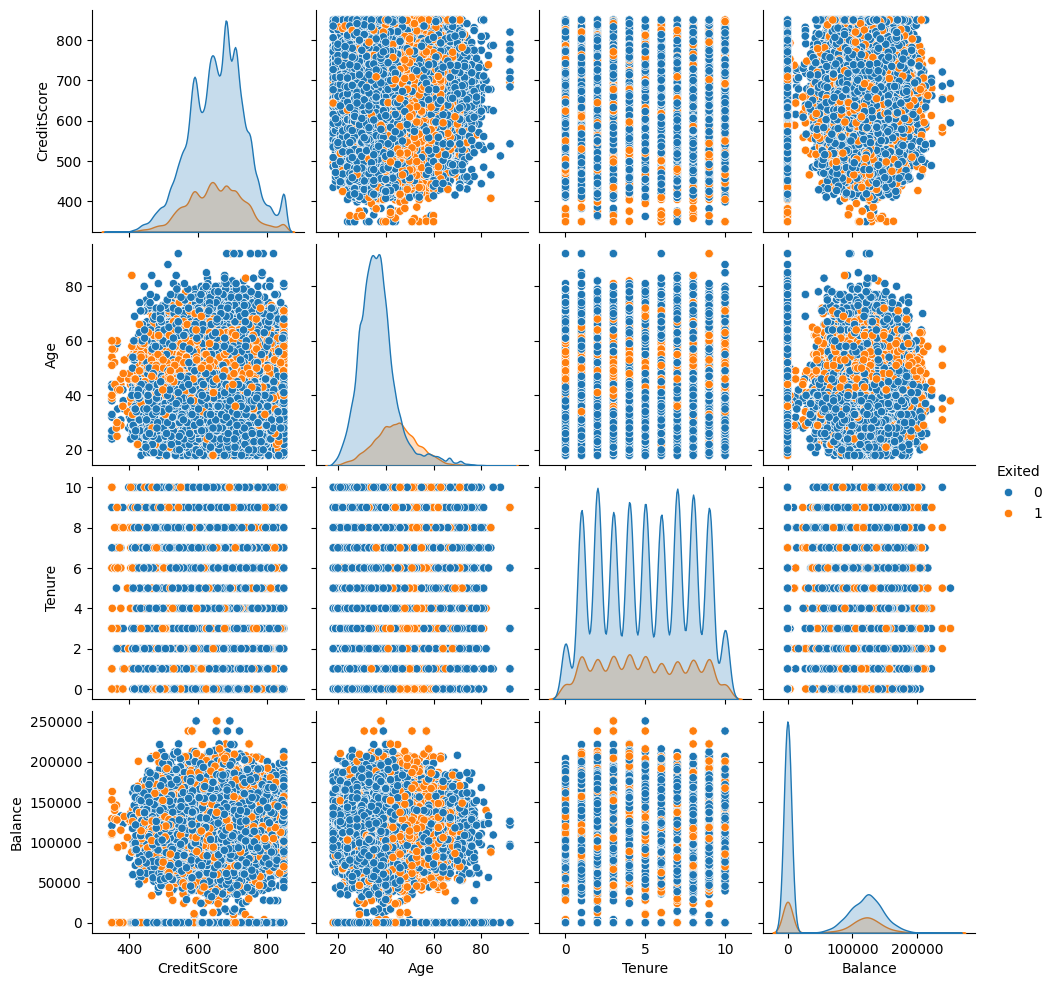

In [12]:
sns.pairplot(df, vars=['CreditScore', 'Age', 'Tenure', 'Balance'], hue='Exited')

In [13]:
print(df.shape)

(175028, 24)


In [14]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0)

# Fit the feature selector to your data
sel.fit(df)

# Get a boolean mask for columns selected
mask = sel.get_support()

# Apply the mask to the DataFrame to keep only non-constant columns
df = df.loc[:, mask]

In [15]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [16]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create a Logistic Regression model object
logistic_regression = LogisticRegression()

# Train the model using the training sets
logistic_regression.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = logistic_regression.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(confusion_matrix)

Accuracy: 0.7864366108667086
[[26657   949]
 [ 6527   873]]


c:\Academics\ML_Projects\Churn_Prediction\ChurnPred\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


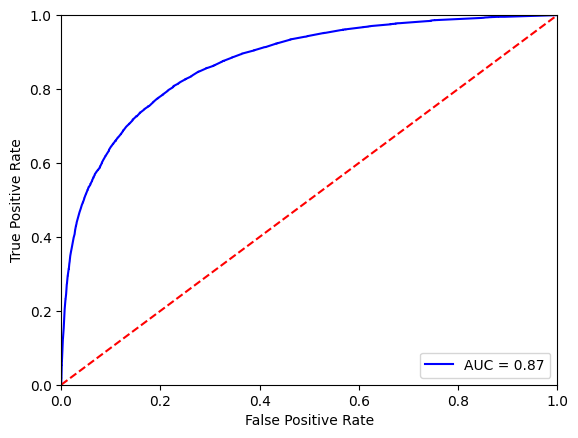

In [23]:
y_pred_proba1 = logistic_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = rf_clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(confusion_matrix)

Accuracy: 0.8577958064331829
[[26064  1542]
 [ 3436  3964]]


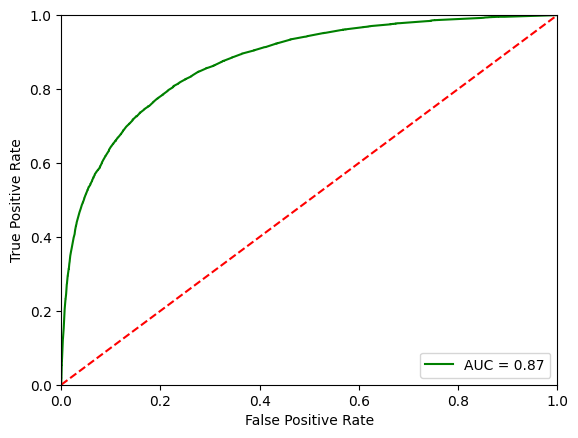

In [24]:
y_pred_proba2 = rf_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

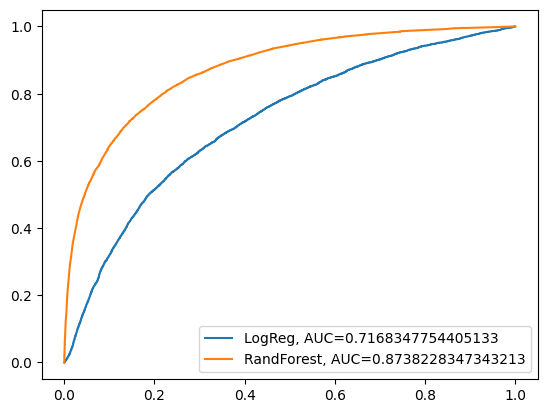

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming 'y_test' is your test data and 'y_pred1' and 'y_pred2' are the predicted probabilities from two models
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr1, tpr1, label='LogReg, AUC='+str(auc1))

fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr2, tpr2, label='RandForest, AUC='+str(auc2))

plt.legend(loc=4)
plt.show()
